### Importing Important Libraries

In [2]:
import pandas as  pd 
import matplotlib.pyplot as plt
import os

### Merging 12 Months of Data into a single file..

In [336]:
files = [item for item in os.listdir("./Sales_Data")]

all_months = pd.DataFrame()

for item in files:
    if item.endswith('.csv'):
        new = pd.read_csv("./Sales_Data/" + item)
        all_months = pd.concat([all_months, new])

all_months.to_csv('all_data.csv', index = False)

df = pd.read_csv('all_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Cleaning the Data

#### Dropping NaN

In [338]:
nan_df = df[df.isna()]
nan_df
del nan_df

df.isna()

df = df.dropna()
df.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


#### Dropping 'Or' Values in Order Date Column

In [339]:
df[df['Order Date'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [340]:
df = df[df['Order Date'].str[0:2] != 'Or']

#### Converting Datatypes

In [341]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

#### Reindexing

In [357]:
df = df.reset_index(drop=True)
df.index += 1
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
1,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
185946,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
185947,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
185948,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
185949,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


### Augmenting Columns

#### Month

In [342]:
df['Order ID'].dtype

dtype('O')

In [343]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype(int)

df['Month'].dtype

dtype('int32')

#### Sales

In [344]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['Sales'].dtype
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### City

In [345]:
def my_fun(pa):
    x = pa.split(", ")
    return x[1] + " " + "(" + x[2][0:2] + ")"

In [346]:
df['City'] = df['Purchase Address'].apply(my_fun)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


#### Hour and Minute

In [348]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [349]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


### Exploratory Data Analysis

#### Which month has produced the highest sales?

In [120]:
tot_sales = df.groupby('Month')[['Sales', 'Quantity Ordered']].sum()
tot_sales

,Sales,Quantity Ordered
Month,,
1,1822256.73,10903
2,2202022.42,13449
3,2807100.38,17005
4,3390670.24,20558
5,3152606.75,18667
6,2577802.26,15253
7,2647775.76,16072
8,2244467.88,13448
9,2097560.13,13109


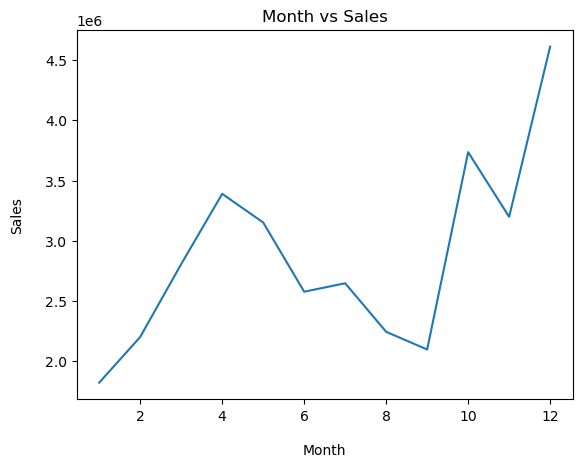

In [386]:
mon = tot_sales.index

plt.plot(mon, tot_sales['Sales'])
plt.title('Month vs Sales')
plt.xlabel('Month', labelpad = 15)
plt.ylabel('Sales', labelpad = 15)

plt.show()

##### The sales begin at around $2 million in January and show a general upward trend until May.

##### There is a decline in sales from May to August, reaching the lowest point just under $2.5 million in August. This may be due to the summer vacation period, where consumers may spend less on electronics and focus on outdoor activities, travel, or vacations.
##### There is a noticeable increase in sales in April and a significant spike in December. The spike in April could be attributed to spring sales promotions or new product launches. December is traditionally the peak sales period due to the holiday season (Christmas, Black Friday, and Cyber Monday in November). Many people purchase electronics as gifts or during sales promotions.


#### Which city is gives the widest market according to quantity ordered and which has produced highest sales?

In [251]:
city_order = df.groupby('City')[['Quantity Ordered', 'Sales']].sum()
city_order

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80
New York City (NY),27932,4664317.43
Portland (ME),2750,449758.27
Portland (OR),11303,1870732.34
San Francisco (CA),50239,8262203.91


In [256]:
city = city_order.index

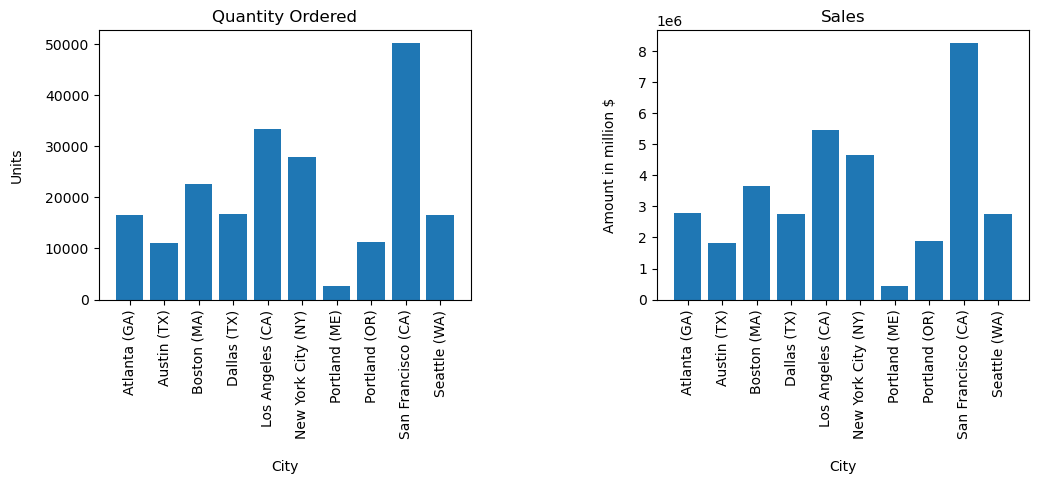

In [385]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3.5))

axs[0].bar(city, city_order['Quantity Ordered'])
axs[0].set_title('Quantity Ordered')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_xlabel('City', labelpad=15)
axs[0].set_ylabel('Units', labelpad = 15)

axs[1].bar(city, city_order['Sales'])
axs[1].set_title('Sales')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_xlabel('City', labelpad=15)
axs[1].set_ylabel('Amount in million $', labelpad = 15)


fig.subplots_adjust(wspace=0.5)

plt.show()


##### San Francisco (CA) has the highest quantity ordered, significantly outpacing all other cities with over 50,000 units. It also generates the highest sales, which is close to $9 million. 
##### Portland (ME) performs poorly in both aspects.
##### The strong performance of cities like San Francisco, Los Angeles, and New York City can be explained by a combination of high population density, a tech-savvy workforce, higher income levels, and stronger retail or e-commerce presence. On the other hand, smaller cities like Portland (ME) likely suffer from lower demand due to smaller populations and fewer businesses, resulting in lower sales and quantities ordered.

#### Which are the busiest hours in a day?

In [181]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Minute'],
      dtype='object')

In [195]:
busy_hours = df.groupby('Hour')[['Order ID', 'Quantity Ordered']].count()
busy_hours

,Order ID,Quantity Ordered
Hour,,
0,3910,3910
1,2350,2350
2,1243,1243
3,831,831
4,854,854
5,1321,1321
6,2482,2482
7,4011,4011
8,6256,6256


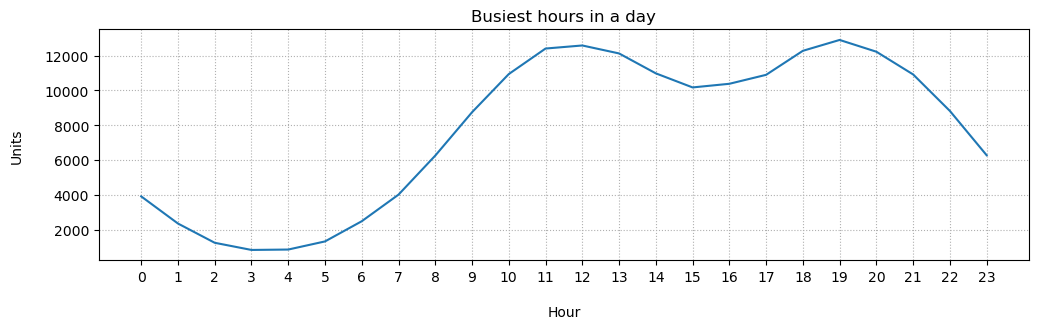

In [389]:
hour = busy_hours.index

plt.figure(figsize=(12, 3))
plt.plot(hour, busy_hours['Order ID'])
plt.xlabel('Hour', labelpad = 15)
plt.ylabel('Units', labelpad = 15)
plt.title('Busiest hours in a day')
plt.xticks(range(0, 24), size = 10)
plt.grid(linestyle = 'dotted')
plt.show()

##### The busiest hours for an electronic store's orders show two distinct peaks, one in the late morning (around 11 AM to 12 PM) and another in the evening (5 PM to 8 PM). People often place orders during morning routines or work breaks, while electronics are frequently checked during productive hours on weekdays. The second surge in activity occurs in the evening, likely as people wind down after work and have more time to browse. 
##### Late-night activity sharply decreases after 9 PM, with minimal orders into the night. 
##### These trends suggest that customers tend to shop during breaks or free time, with higher engagement in the morning and after work hours. Therefore, these are the best hours in a day to introduce new offers to increase customer retention. Other than this, new products must be launched in the most active hours so more and more people interact with it.

#### Which product is sold the most and what are the sales?

In [330]:
prod_per = df.groupby('Product')[['Sales', 'Quantity Ordered']].sum()
prod_per

,Sales,Quantity Ordered
Product,,
20in Monitor,454148.71,4129
27in 4K Gaming Monitor,2435097.56,6244
27in FHD Monitor,1132424.50,7550
34in Ultrawide Monitor,2355558.01,6199
AA Batteries (4-pack),106118.40,27635
AAA Batteries (4-pack),92740.83,31017
Apple Airpods Headphones,2349150.00,15661
Bose SoundSport Headphones,1345565.43,13457
Flatscreen TV,1445700.00,4819


In [331]:
prod = prod_per.index

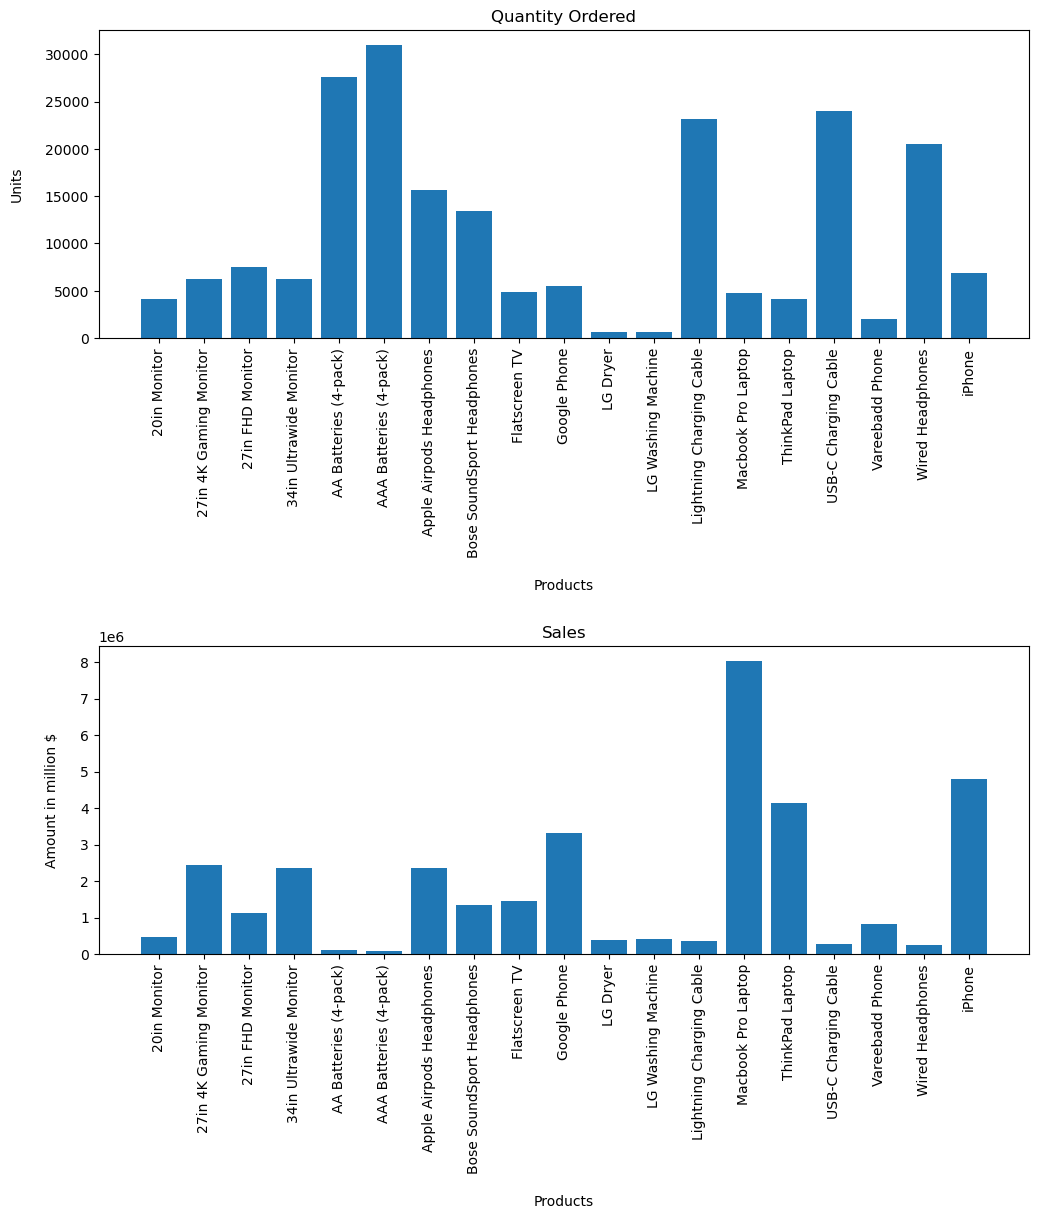

In [392]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].bar(prod, prod_per['Quantity Ordered'])
axs[0].set_title('Quantity Ordered')
axs[0].set_xlabel('Products', labelpad = 15)
axs[0].set_ylabel('Units', labelpad = 15)
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(prod, prod_per['Sales'])
axs[1].set_title('Sales')
axs[1].set_xlabel('Products', labelpad = 15)
axs[1].set_ylabel('Amount in million $', labelpad = 15)

axs[1].tick_params(axis='x', rotation=90)

fig.subplots_adjust(hspace=1)

plt.show()

##### The Macbook Pro Laptop and iPhone lead in sales, while charging cables and batteries are ordered frequently but contribute less revenue. Mid-range items like Wired Headphones and monitors show balanced sales and quantity. Appliances like the LG Dryer and Washing Machine have the lowest performance. 
##### In summary, high-ticket items like Macbook Pro Laptop and iPhone drive most of the store's revenue, while smaller, less expensive items like batteries and charging cables move in higher quantities but contribute less to overall sales.